<a href="https://colab.research.google.com/github/kathrynle20/CensusDataAnalysis/blob/master/Columbia_Census_Group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/adult.data')

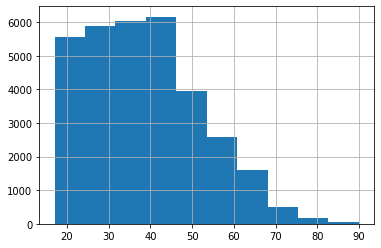

In [ ]:
df.Age.hist()

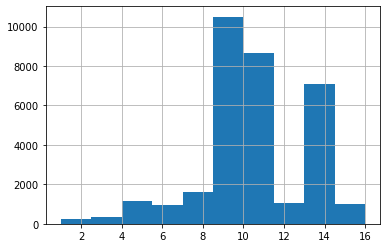

In [ ]:
df.EducationNum.hist()

In [ ]:
df

,Age,Workclass,FNLWGT,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.describe()

,Age,FNLWGT,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.loc[df.Income == ' <=50K']

,Age,Workclass,FNLWGT,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.drop(["FNLWGT", "CapitalGain", "CapitalLoss", "Education"], axis = 1, inplace = True) 

In [ ]:
df['Native'] = 0
df.loc[df['NativeCountry'] == " United-States", 'Native'] = 1
df['>50K'] = 0
df.loc[df['Income'] == " >50K", '>50K'] = 1
df

,Age,Workclass,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,HoursPerWeek,NativeCountry,Income,Native,>50K
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,1,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,1,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,1,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,1,0
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,1,1
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,1,0
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,1,0


In [ ]:
df = df.join(pd.get_dummies(df['Sex'], prefix = 'Sex'))
df = df.join(pd.get_dummies(df['Race'], prefix = 'Race'))
df = df.join(pd.get_dummies(df['Occupation'], prefix = 'Oc'))
df = df.join(pd.get_dummies(df['MaritalStatus'], prefix = 'MS'))
df = df.join(pd.get_dummies(df['Workclass'], prefix = 'WC'))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df[['Age','HoursPerWeek', 'EducationNum']])
df_scaled = pd.DataFrame(data=scaled, columns = ['Age_scaled','HoursPerWeek_scaled', 'EducationNum_scaled'])
df_scaled
df = df.join(df_scaled)

In [ ]:
scaler = MinMaxScaler()

scaled = scaler.fit_transform(df[['Age','HoursPerWeek', 'EducationNum']])
df_scaled = pd.DataFrame(data=scaled,columns=['Age_MinMaxScaled','HoursPerWeek_MinMaxScaled', 'EducationNum_MinMaxScaled'])
df_scaled
df = df.join(df_scaled)

In [ ]:
df = df.loc[df['Workclass'] != ' ?']
df = df.loc[df['NativeCountry'] != ' ?']
df = df.loc[df['Occupation'] != ' ?']
df

,Age,Workclass,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,HoursPerWeek,NativeCountry,Income,Native,>50K,Sex_ Female,Sex_ Male,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Oc_ ?,Oc_ Adm-clerical,Oc_ Armed-Forces,Oc_ Craft-repair,Oc_ Exec-managerial,Oc_ Farming-fishing,Oc_ Handlers-cleaners,Oc_ Machine-op-inspct,Oc_ Other-service,Oc_ Priv-house-serv,Oc_ Prof-specialty,Oc_ Protective-serv,Oc_ Sales,Oc_ Tech-support,Oc_ Transport-moving,MS_ Divorced,MS_ Married-AF-spouse,MS_ Married-civ-spouse,MS_ Married-spouse-absent,MS_ Never-married,MS_ Separated,MS_ Widowed,WC_ ?,WC_ Federal-gov,WC_ Local-gov,WC_ Never-worked,WC_ Private,WC_ Self-emp-inc,WC_ Self-emp-not-inc,WC_ State-gov,WC_ Without-pay,Age_scaled,HoursPerWeek_scaled,EducationNum_scaled,Age_MinMaxScaled,HoursPerWeek_MinMaxScaled,EducationNum_MinMaxScaled
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.030671,-0.035429,1.134739,0.301370,0.397959,0.800000
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.837109,-2.222153,1.134739,0.452055,0.122449,0.800000
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.042642,-0.035429,-0.420060,0.287671,0.397959,0.533333
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.057047,-0.035429,-1.197459,0.493151,0.397959,0.400000
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.775768,-0.035429,1.134739,0.150685,0.397959,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.849080,-0.197409,0.746039,0.136986,0.377551,0.733333
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.103983,-0.035429,-0.420060,0.315068,0.397959,0.533333
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1.423610,-0.035429,-0.420060,0.561644,0.397959,0.533333
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,-1.215643,-1.655225,-0.420060,0.068493,0.193878,0.533333


In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

X = df[['Native','Age','Sex_ Female','Sex_ Male',"EducationNum",'HoursPerWeek_MinMaxScaled','Race_ Amer-Indian-Eskimo','Race_ Asian-Pac-Islander',
 'Race_ Black',
 'Race_ Other',
 'Race_ White','Oc_ Adm-clerical',
 'Oc_ Armed-Forces',
 'Oc_ Craft-repair',
 'Oc_ Exec-managerial',
 'Oc_ Farming-fishing',
 'Oc_ Handlers-cleaners',
 'Oc_ Machine-op-inspct',
 'Oc_ Other-service',
 'Oc_ Priv-house-serv',
 'Oc_ Prof-specialty',
 'Oc_ Protective-serv',
 'Oc_ Sales',
 'Oc_ Tech-support',
 'Oc_ Transport-moving']]
y = df['>50K']

LR.fit(X,y)
df['prediction'] = LR.predict(X)
df

,Age,Workclass,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,HoursPerWeek,NativeCountry,Income,Native,>50K,Sex_ Female,Sex_ Male,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Oc_ ?,Oc_ Adm-clerical,Oc_ Armed-Forces,Oc_ Craft-repair,Oc_ Exec-managerial,Oc_ Farming-fishing,Oc_ Handlers-cleaners,Oc_ Machine-op-inspct,Oc_ Other-service,Oc_ Priv-house-serv,Oc_ Prof-specialty,Oc_ Protective-serv,Oc_ Sales,Oc_ Tech-support,Oc_ Transport-moving,MS_ Divorced,MS_ Married-AF-spouse,MS_ Married-civ-spouse,MS_ Married-spouse-absent,MS_ Never-married,MS_ Separated,MS_ Widowed,WC_ ?,WC_ Federal-gov,WC_ Local-gov,WC_ Never-worked,WC_ Private,WC_ Self-emp-inc,WC_ Self-emp-not-inc,WC_ State-gov,WC_ Without-pay,Age_scaled,HoursPerWeek_scaled,EducationNum_scaled,Age_MinMaxScaled,HoursPerWeek_MinMaxScaled,EducationNum_MinMaxScaled,prediction
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.030671,-0.035429,1.134739,0.301370,0.397959,0.800000,0.378830
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.837109,-2.222153,1.134739,0.452055,0.122449,0.800000,0.509717
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.042642,-0.035429,-0.420060,0.287671,0.397959,0.533333,0.150251
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.057047,-0.035429,-1.197459,0.493151,0.397959,0.400000,0.125329
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.775768,-0.035429,1.134739,0.150685,0.397959,0.800000,0.231947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.849080,-0.197409,0.746039,0.136986,0.377551,0.733333,0.176371
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.103983,-0.035429,-0.420060,0.315068,0.397959,0.533333,0.207274
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1.423610,-0.035429,-0.420060,0.561644,0.397959,0.533333,0.182581
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,-1.215643,-1.655225,-0.420060,0.068493,0.193878,0.533333,0.050565


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
 
np.sqrt(mean_squared_error(df['>50K'],df['prediction']))

0.3757025007155556

In [ ]:
LR.coef_

array([-0.00725031,  0.00600658, -0.08270419,  0.08270419,  0.03624135,
        0.39781523, -0.03600469,  0.01518609, -0.00568957, -0.01033987,
        0.03684805, -0.00600093, -0.10618277, -0.01576575,  0.16841662,
       -0.13804525, -0.08360786, -0.03859782, -0.04530336,  0.00560457,
        0.11388427,  0.05931647,  0.05180189,  0.07338783, -0.03890791])

In [ ]:
df.drop(['WC_ ?'], axis=1,inplace=True)
df.drop(['Oc_ ?'], axis=1,inplace=True)

In [ ]:
df.Income.value_counts()

 <=50K    22654
 >50K      7508
Name: Income, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

KNN = KNeighborsClassifier(n_neighbors=3)

X = df[['Native','Age_scaled',"EducationNum",'HoursPerWeek_MinMaxScaled','Sex_ Female','Sex_ Male',
 'Oc_ Adm-clerical',
 'Oc_ Armed-Forces',
 'Oc_ Craft-repair',
 'Oc_ Exec-managerial',
 'Oc_ Farming-fishing',
 'Oc_ Handlers-cleaners',
 'Oc_ Machine-op-inspct',
 'Oc_ Other-service',
 'Oc_ Priv-house-serv',
 'Oc_ Prof-specialty',
 'Oc_ Protective-serv',
 'Oc_ Sales',
 'Oc_ Tech-support',
 'Oc_ Transport-moving','MS_ Divorced',
 'MS_ Married-AF-spouse',
 'MS_ Married-civ-spouse',
 'MS_ Married-spouse-absent',
 'MS_ Never-married',
 'MS_ Separated',
 'MS_ Widowed',
 'WC_ Federal-gov',
 'WC_ Local-gov',
 'WC_ Never-worked',
 'WC_ Private',
 'WC_ Self-emp-inc',
 'WC_ Self-emp-not-inc',
 'WC_ State-gov',
 'WC_ Without-pay']]
y = df['>50K']

KNN.fit(X, y)

df['prediction'] = KNN.predict(X)
df[['>50K','prediction']].sample(20)

,>50K,prediction
18949,0,0
5376,0,0
20097,0,0
31095,1,1
23705,0,0
14873,0,1
2260,0,0
8311,0,0
20449,0,0
4296,0,0


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
cv = KFold(n_splits=20,shuffle=True)

print(cross_val_score(LogR,X,y,cv=5,scoring='f1_macro'))
score = cross_val_score(LogR,X,y,cv=5,scoring='f1_macro')
np.mean(score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.74897174 0.7429218  0.75117743 0.7604024  0.7609878 ]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7528922335800193

In [ ]:
print(f1_score(df['>50K'],df['prediction'],average='macro'))

0.8382822916572432


In [ ]:
from sklearn.linear_model import LogisticRegression

LogR = LogisticRegression()

X = df[['Native','Age_MinMaxScaled','Sex_ Female','Sex_ Male',"EducationNum",'HoursPerWeek_MinMaxScaled','Oc_ Adm-clerical',
 'Oc_ Armed-Forces',
 'Oc_ Craft-repair',
 'Oc_ Exec-managerial',
 'Oc_ Farming-fishing',
 'Oc_ Handlers-cleaners',
 'Oc_ Machine-op-inspct',
 'Oc_ Other-service',
 'Oc_ Priv-house-serv',
 'Oc_ Prof-specialty',
 'Oc_ Protective-serv',
 'Oc_ Sales',
 'Oc_ Tech-support',
 'Oc_ Transport-moving','MS_ Divorced',
 'MS_ Married-AF-spouse',
 'MS_ Married-civ-spouse',
 'MS_ Married-spouse-absent',
 'MS_ Never-married',
 'MS_ Separated',
 'MS_ Widowed',
 'WC_ Federal-gov',
 'WC_ Local-gov',
 'WC_ Never-worked',
 'WC_ Private',
 'WC_ Self-emp-inc',
 'WC_ Self-emp-not-inc',
 'WC_ State-gov',
 'WC_ Without-pay']]
y = df['>50K']

LogR.fit(X, y)
 
df['prediction'] = LogR.predict(X)
df[['>50K','prediction']].sample(20)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,>50K,prediction
29331,0,0
14934,0,0
13344,0,0
26648,0,1
1306,0,0
9517,0,0
9336,0,0
6280,0,0
29872,1,1
21921,0,0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(accuracy_score(df['>50K'],df['prediction']))
print(recall_score(df['>50K'],df['prediction'],average='macro'))
print(precision_score(df['>50K'],df['prediction'],average='macro'))
print(f1_score(df['>50K'],df['prediction'],average='macro'))

0.8289569657184537
0.7371560091942069
0.7791151303139606
0.7536157338387605


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


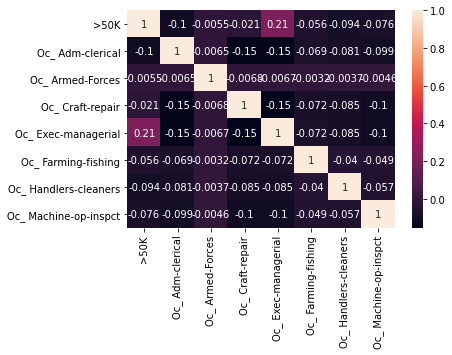

In [ ]:
import seaborn as sn
sn.heatmap(df[[
 '>50K',
 'Oc_ Adm-clerical',
 'Oc_ Armed-Forces',
 'Oc_ Craft-repair',
 'Oc_ Exec-managerial',
 'Oc_ Farming-fishing',
 'Oc_ Handlers-cleaners',
 'Oc_ Machine-op-inspct',

 ]].corr(), annot=True)

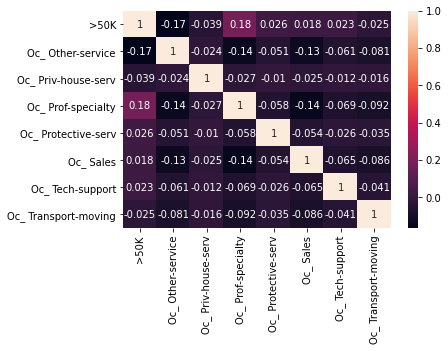

In [ ]:

import seaborn as sn
sn.heatmap(df[[
 '>50K',
 'Oc_ Other-service',
 'Oc_ Priv-house-serv',
 'Oc_ Prof-specialty',
 'Oc_ Protective-serv',
 'Oc_ Sales',
 'Oc_ Tech-support',
 'Oc_ Transport-moving'

 ]].corr(), annot=True)

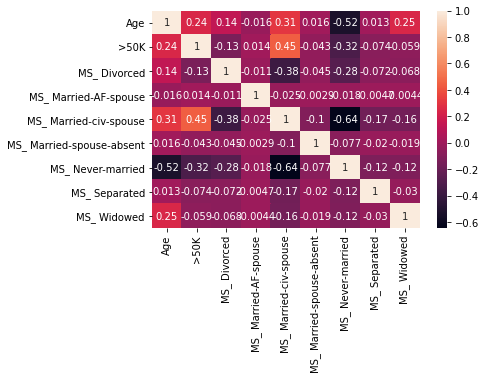

In [ ]:
import seaborn as sn
sn.heatmap(df[['Age',
 '>50K',
 'MS_ Divorced',
 'MS_ Married-AF-spouse',
 'MS_ Married-civ-spouse',
 'MS_ Married-spouse-absent',
 'MS_ Never-married',
 'MS_ Separated',
 'MS_ Widowed'
 ]].corr(), annot=True)

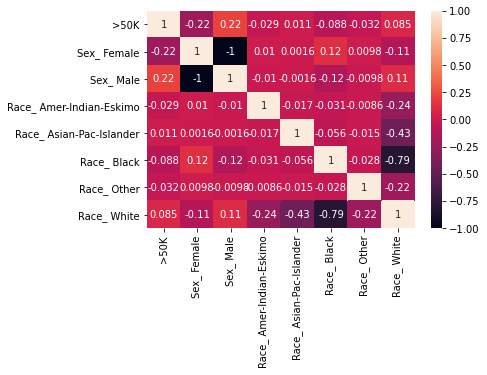

In [ ]:
import seaborn as sn
sn.heatmap(df[[
 '>50K',
 'Sex_ Female',
 'Sex_ Male',
 'Race_ Amer-Indian-Eskimo',
 'Race_ Asian-Pac-Islander',
 'Race_ Black',
 'Race_ Other',
 'Race_ White'
 ]].corr(), annot=True)

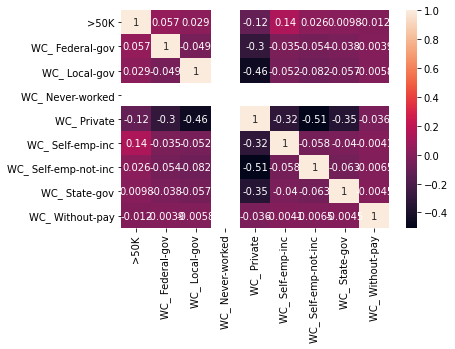

In [ ]:
import seaborn as sn
sn.heatmap(df[[
 '>50K',
 'WC_ Federal-gov',
 'WC_ Local-gov',
 'WC_ Never-worked',
 'WC_ Private',
 'WC_ Self-emp-inc',
 'WC_ Self-emp-not-inc',
 'WC_ State-gov',
 'WC_ Without-pay'
 ]].corr(), annot=True)

In [ ]:
pd.crosstab(df.EducationNum, df['>50K']).apply(lambda r: r/r.sum(), axis=1)

>50K,0,1
EducationNum,,
1,1.000000,0.000000
2,0.960265,0.039735
3,0.958333,0.041667
4,0.937163,0.062837
5,0.945055,0.054945
6,0.928049,0.071951
7,0.943702,0.056298
8,0.923077,0.076923
9,0.835671,0.164329


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.linear_model import LogisticRegression

LogR = LogisticRegression()

X = df[[ 'Native',
 'Sex_ Female',
 'Sex_ Male',
 'Race_ Amer-Indian-Eskimo',
 'Race_ Asian-Pac-Islander',
 'Race_ Black',
 'Race_ Other',
 'Race_ White',
 'Oc_ Adm-clerical',
 'Oc_ Armed-Forces',
 'Oc_ Craft-repair',
 'Oc_ Exec-managerial',
 'Oc_ Farming-fishing',
 'Oc_ Handlers-cleaners',
 'Oc_ Machine-op-inspct',
 'Oc_ Other-service',
 'Oc_ Priv-house-serv',
 'Oc_ Prof-specialty',
 'Oc_ Protective-serv',
 'Oc_ Sales',
 'Oc_ Tech-support',
 'Oc_ Transport-moving',
 'MS_ Divorced',
 'MS_ Married-AF-spouse',
 'MS_ Married-civ-spouse',
 'MS_ Married-spouse-absent',
 'MS_ Never-married',
 'MS_ Separated',
 'MS_ Widowed',
 'WC_ Federal-gov',
 'WC_ Local-gov',
 'WC_ Never-worked',
 'WC_ Private',
 'WC_ Self-emp-inc',
 'WC_ Self-emp-not-inc',
 'WC_ State-gov',
 'WC_ Without-pay'
 ]]
y = df['>50K']

sfs = SFS(KNN, 
          k_features=20, 
          scoring='f1_macro',
          cv=5)

sfs = sfs.fit(X, y)
sfs.get_metric_dict()

{1: {'avg_score': 0.6323071976551996,
  'ci_bound': 0.13075820829510978,
  'cv_scores': array([0.68818241, 0.67965713, 0.42895011, 0.68537348, 0.67937286]),
  'feature_idx': (24,),
  'feature_names': ('MS_ Married-civ-spouse',),
  'std_dev': 0.10173432833969479,
  'std_err': 0.05086716416984739},
 2: {'avg_score': 0.668287595307131,
  'ci_bound': 0.03844055212016967,
  'cv_scores': array([0.68818241, 0.67965713, 0.6088521 , 0.68537348, 0.67937286]),
  'feature_idx': (24, 32),
  'feature_names': ('MS_ Married-civ-spouse', 'WC_ Private'),
  'std_dev': 0.029908055501390262,
  'std_err': 0.014954027750695131},
 3: {'avg_score': 0.6967229062935811,
  'ci_bound': 0.0036003365580122063,
  'cv_scores': array([0.69878691, 0.69623095, 0.69561943, 0.70057541, 0.69240184]),
  'feature_idx': (15, 24, 32),
  'feature_names': ('Oc_ Other-service',
   'MS_ Married-civ-spouse',
   'WC_ Private'),
  'std_dev': 0.002801184157399615,
  'std_err': 0.0014005920786998073},
 4: {'avg_score': 0.708472027332146

In [ ]:
list(df)

['Age',
 'Workclass',
 'EducationNum',
 'MaritalStatus',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'HoursPerWeek',
 'NativeCountry',
 'Income',
 'Native',
 '>50K',
 'Sex_ Female',
 'Sex_ Male',
 'Race_ Amer-Indian-Eskimo',
 'Race_ Asian-Pac-Islander',
 'Race_ Black',
 'Race_ Other',
 'Race_ White',
 'Oc_ Adm-clerical',
 'Oc_ Armed-Forces',
 'Oc_ Craft-repair',
 'Oc_ Exec-managerial',
 'Oc_ Farming-fishing',
 'Oc_ Handlers-cleaners',
 'Oc_ Machine-op-inspct',
 'Oc_ Other-service',
 'Oc_ Priv-house-serv',
 'Oc_ Prof-specialty',
 'Oc_ Protective-serv',
 'Oc_ Sales',
 'Oc_ Tech-support',
 'Oc_ Transport-moving',
 'MS_ Divorced',
 'MS_ Married-AF-spouse',
 'MS_ Married-civ-spouse',
 'MS_ Married-spouse-absent',
 'MS_ Never-married',
 'MS_ Separated',
 'MS_ Widowed',
 'WC_ Federal-gov',
 'WC_ Local-gov',
 'WC_ Never-worked',
 'WC_ Private',
 'WC_ Self-emp-inc',
 'WC_ Self-emp-not-inc',
 'WC_ State-gov',
 'WC_ Without-pay',
 'Age_scaled',
 'HoursPerWeek_scaled',
 'EducationNum_scaled'

IndexError: ignored

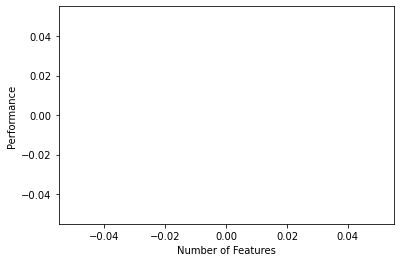

In [ ]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)

X = df[['Native','Age_scaled',"EducationNum",'HoursPerWeek_MinMaxScaled','Sex_ Female','Sex_ Male',
 'MS_ Divorced',
 'MS_ Married-AF-spouse',
 'MS_ Married-civ-spouse',
 'MS_ Married-spouse-absent',
 'MS_ Never-married',
 'MS_ Separated',
 'MS_ Widowed',
 'Oc_ Adm-clerical',
 'Oc_ Armed-Forces',
 'Oc_ Craft-repair',
 'Oc_ Exec-managerial',
 'Oc_ Farming-fishing',
 'Oc_ Handlers-cleaners',
 'Oc_ Machine-op-inspct',
 'Oc_ Other-service',
 'Oc_ Priv-house-serv',
 'Oc_ Prof-specialty',
 'Oc_ Protective-serv',
 'Oc_ Sales',
 'Oc_ Tech-support',
 'Oc_ Transport-moving']]
y = df['>50K']


In [ ]:
cv = KFold(n_splits=20,shuffle=True)

print(cross_val_score(KNN,X,y,cv=5,scoring='f1_macro'))
score = cross_val_score(KNN,X,y,cv=5,scoring='f1_macro')
np.mean(score)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)

X = df[['Native','Age_scaled',"EducationNum",'HoursPerWeek_MinMaxScaled']]
y = df['>50K']

sfs = SFS(KNN, 
          k_features=4, 
          scoring='f1_macro',
          cv=5)
sfs = sfs.fit(X,y)
sfs.get_metric_dict()

In [ ]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
df['EducationNum_MinMaxScaledUp'] = df['EducationNum_MinMaxScaled']

In [ ]:
df.drop(['poor_clusters'],axis=1,inplace=True)
list(df)

In [ ]:
from sklearn.cluster import KMeans

#setting features to X
X = df[['Native',
 'Oc_ Adm-clerical',
 'Oc_ Armed-Forces',
 'Oc_ Craft-repair',
 'Oc_ Exec-managerial',
 'Oc_ Farming-fishing',
 'Oc_ Handlers-cleaners',
 'Oc_ Machine-op-inspct',
 'Oc_ Other-service',
 'Oc_ Priv-house-serv',
 'Oc_ Prof-specialty',
 'Oc_ Protective-serv',
 'Oc_ Sales',
 'Oc_ Tech-support',
 'Oc_ Transport-moving','MS_ Divorced',
 'MS_ Married-AF-spouse',
 'MS_ Married-civ-spouse',
 'MS_ Married-spouse-absent',
 'MS_ Never-married',
 'MS_ Separated',
 'MS_ Widowed',
 'WC_ Federal-gov',
 'WC_ Local-gov',
 'WC_ Never-worked',
 'WC_ Private',
 'WC_ Self-emp-inc',
 'WC_ Self-emp-not-inc',
 'WC_ State-gov',
 'WC_ Without-pay',
 'Age_MinMaxScaled',
 'HoursPerWeek_MinMaxScaled',
 'EducationNum_MinMaxScaled']]

#initializing KMeans and the amount of clusters to form
kmeans = KMeans(n_clusters = 5)
df['clusters'] = kmeans.fit_predict(X)

In [ ]:
pd.crosstab(df.clusters, df['>50K']).apply(lambda r: r/r.sum(), axis=1).plot.bar(stacked=True)

In [ ]:
import seaborn as sns

sns.catplot(x='Occupation', col='clusters', data= df, kind='box', orient='v')

In [ ]:
df.drop(['clusters_0','clusters_1','clusters_2'],axis=1,inplace=True)

In [ ]:
df = df.join(pd.get_dummies(df['clusters'],prefix='clusters'))

In [ ]:
from sklearn.linear_model import LogisticRegression

LogR = LogisticRegression()

X = df[['Native','Age_MinMaxScaled','Sex_ Female','Sex_ Male','EducationNum_MinMaxScaled','HoursPerWeek_MinMaxScaled','Oc_ Adm-clerical',
 'Oc_ Armed-Forces',
 'Oc_ Craft-repair',
 'Oc_ Exec-managerial',
 'Oc_ Farming-fishing',
 'Oc_ Handlers-cleaners',
 'Oc_ Machine-op-inspct',
 'Oc_ Other-service',
 'Oc_ Priv-house-serv',
 'Oc_ Prof-specialty',
 'Oc_ Protective-serv',
 'Oc_ Sales',
 'Oc_ Tech-support',
 'Oc_ Transport-moving','MS_ Divorced',
 'MS_ Married-AF-spouse',
 'MS_ Married-civ-spouse',
 'MS_ Married-spouse-absent',
 'MS_ Never-married',
 'MS_ Separated',
 'MS_ Widowed',
 'WC_ Federal-gov',
 'WC_ Local-gov',
 'WC_ Never-worked',
 'WC_ Private',
 'WC_ Self-emp-inc',
 'WC_ Self-emp-not-inc',
 'WC_ State-gov',
 'WC_ Without-pay']]
y = df['>50K']

LogR.fit(X, y)
 
df['prediction'] = LogR.predict(X)
df[['>50K','prediction']].sample(20)

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
cv = KFold(n_splits=20,shuffle=True)

print(cross_val_score(LogR,X,y,cv=5,scoring='f1_macro'))
score = cross_val_score(LogR,X,y,cv=5,scoring='f1_macro')
np.mean(score)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
 
AB = AdaBoostClassifier()
GB = GradientBoostingClassifier()
print(np.mean(cross_val_score(AB, X, y, cv=5, scoring = 'f1_macro')))
print(np.mean(cross_val_score(GB, X, y, cv=5, scoring = 'f1_macro')))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5,weights='distance')

X = df[['Native','Age_MinMaxScaled','Sex_ Female','Sex_ Male','EducationNum_MinMaxScaled','HoursPerWeek_MinMaxScaled','Oc_ Adm-clerical',
 'Oc_ Armed-Forces',
 'Oc_ Craft-repair',
 'Oc_ Exec-managerial',
 'Oc_ Farming-fishing',
 'Oc_ Handlers-cleaners',
 'Oc_ Machine-op-inspct',
 'Oc_ Other-service',
 'Oc_ Priv-house-serv',
 'Oc_ Prof-specialty',
 'Oc_ Protective-serv',
 'Oc_ Sales',
 'Oc_ Tech-support',
 'Oc_ Transport-moving','MS_ Divorced',
 'MS_ Married-AF-spouse',
 'MS_ Married-civ-spouse',
 'MS_ Married-spouse-absent',
 'MS_ Never-married',
 'MS_ Separated',
 'MS_ Widowed',
 'WC_ Federal-gov',
 'WC_ Local-gov',
 'WC_ Never-worked',
 'WC_ Private',
 'WC_ Self-emp-inc',
 'WC_ Self-emp-not-inc',
 'WC_ State-gov',
 'WC_ Without-pay']]
y = df['>50K']

KNN.fit(X, y)
 
df['prediction'] = KNN.predict(X)
df[['>50K','prediction']].sample(20)

In [ ]:
score = cross_val_score(KNN,X,y,cv=5,scoring='f1_macro')
np.mean(score)